# Part II - Ford GoBike Analysis
## by Chelagat Pauline Gechure

## Investigation Overview
**Analysis aim** 
- Ford GoBike implemented in 2013 is a regional bike-sharing network aimed at enhancing accessible, affordable and sustainable transportation in the San Francisco Bay Area. The aim of the analysis is to determine factors that influenced bike rides in the area in 2019.

**Key Insights**
- Upto 80% of the users are subscribers and consequently more bike rides from them.
- Customers have average bike rides being twice as long as the average subscriber bike ride.
- Bike ride durations peaked between June and October 2019 and drop as the year came to a close.
- Most subscriber rides happen during the weekdays with a drop during the weekend but there is a steady demand for the bikes from customers throughout.
- Most bike rides happen during morning hours between 7am and 8am and evening between 4pm and 6pm.

## Dataset Overview
- The cleaned dataset has 2,506,944 observations and 12 columns covering 2019 rides in San Francisco Bay Area. The columns generally consist of station information, type of user, month, day, date and time of ride and the duration of the ride in minutes and hours.

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2019_ford_gobikes_clean_data.csv')

# Datatypes formats are lost during storage therefore datatypes have to be changed after loading the cleaned dataset.
# Changing the columns to categorical format.
for cat_col in ['user_type','start_month', 'start_date', 'start_day', 'start_hour',
                'end_month','end_date', 'end_day', 'end_hour']:
    df[cat_col] = df[cat_col].astype('category')
    
# Changing the columns to string format.
for str_col in ['bike_id']:
    df[str_col] = df[str_col].astype(str)

print(df.shape)
#Confirming that the datatypes are changed
df.info()

(2506944, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506944 entries, 0 to 2506943
Data columns (total 12 columns):
bike_id           object
user_type         category
start_month       category
start_date        category
start_day         category
start_hour        category
end_month         category
end_date          category
end_day           category
end_hour          category
duration_min      float64
duration_hours    float64
dtypes: category(9), float64(2), object(1)
memory usage: 78.9+ MB


## Visualization 1

> **Distribution of types of users:** **80%** of the users are subscribers who are members and roughly **20%** are customers (not members).

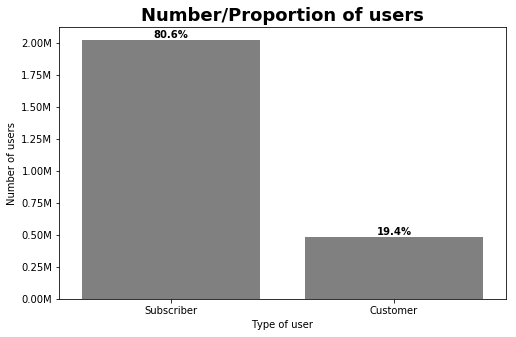

In [24]:
#Calculating the number of rides per day
user_counts = df['user_type'].value_counts()

#Getting the total number of rides in all the days
total_users = df['user_type'].value_counts().sum()

#Creating the order to be used for plotting
user_order = ['Subscriber', 'Customer']

# Plotting the graph
fig, ax = plt.subplots(figsize = (8,5))
g = sb.countplot(data=df, x='user_type', color = 'grey', order = user_order)
plt.title('Number/Proportion of users', fontsize=18, fontweight='bold')
plt.xlabel('Type of user')
plt.ylabel('Number of users');

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=0) 

#Formating the y-axis labels
ylabels = ['{:,.2f}'.format(x) + 'M' for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', verticalalignment = 'bottom', fontweight = 'semibold')

## Visualization 2

> **Average trip duration per user type:** Customers have average bike rides that are twice as long as the average subscriber bike rides. Although there are fewer bike rides from customers they are definitely longer on average.

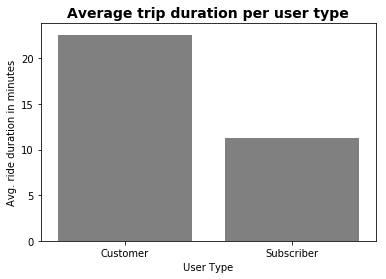

In [25]:
#Average trip duration per user type
sb.barplot(data = df, x = 'user_type', y = 'duration_min', errwidth = 0, color = 'grey')
plt.title('Average trip duration per user type', fontsize=14, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=10)
plt.xlabel('User Type', fontsize=10);

## Visualization 3
> **Distribution of user type rides per day of the week:** Most subscriber rides happen during the weekdays with a significant drop during the weekend. Customer rides on the other hand are steady with a slight increase during the weekend.


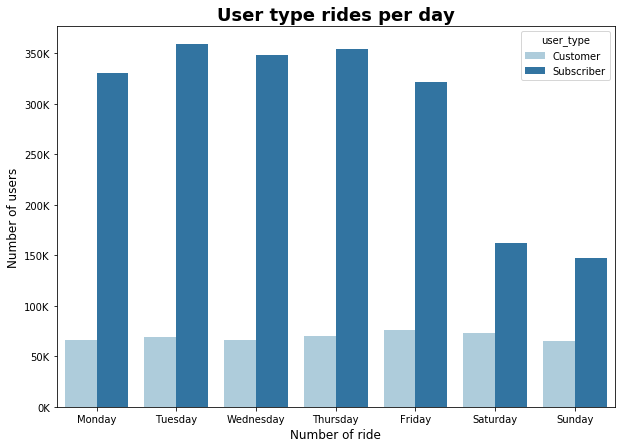

In [26]:
#Distribution of bike rides per day between the two user types
#Creating the order to be used for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Genarting the plot
plt.figure(figsize = [10, 7])
g= sb.countplot(data = df, x = 'start_day', hue = 'user_type',
             order = day_order, palette = 'Paired')
plt.title('User type rides per day', fontsize=18, fontweight='bold')
plt.xlabel('Number of ride', fontsize=12)
plt.ylabel('Number of users', fontsize=12);

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

## Visualization 4
> **Monthy average bike ride duration:** The average bike ride durations peaked between June and October 2019 and drop as the year came to a close. This months coincide with summer and autumn seasons which are favourable for outdoor activities which encouraged the use of the bikes for mobility. The drop in the begging of the year and end of the year are attirbuted to winter which is not suitabke for outdoor activities.

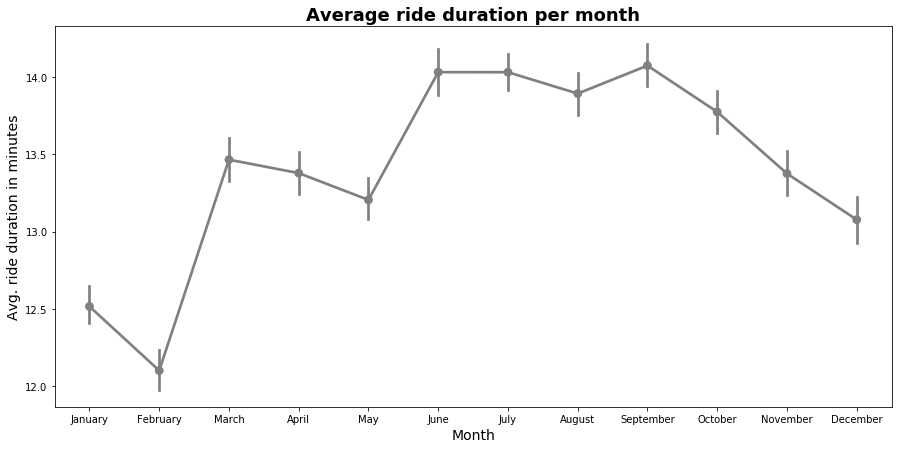

In [27]:
#Average trip duration per month
#Creating the order to be used for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

#Generating the actual plot
plt.figure(figsize = (15, 7))
sb.pointplot(data = df, x = 'start_month', y = 'duration_min',order = month_order, color = 'grey')
plt.title('Average ride duration per month', fontsize=18, fontweight='bold')
plt.ylabel('Avg. ride duration in minutes', fontsize=14)
plt.xlabel('Month', fontsize=14);

## Visualization 5
> **User type rides per date of the month:** Most bike rides happen during morning hours between 7am and 8am and evening between 4pm and 6pm. These hours are cummuter hours as most individuals are going to and from work and hence use the bikes as a form of transport.

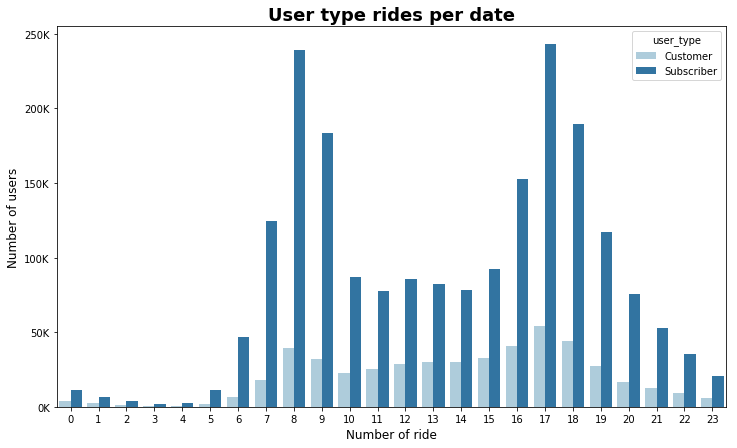

In [28]:
plt.figure(figsize = [12, 7])
g = sb.countplot(data = df, x = 'start_hour', hue = 'user_type' , palette = 'Paired')
plt.title('User type rides per date', fontsize=18, fontweight='bold')
plt.xlabel('Number of ride', fontsize=12)
plt.ylabel('Number of users', fontsize=12);

#Formating the y-axis labels
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [31]:
# Use this command if you are running this file in local
#!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --template output-toggle.tpl --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout instead of files.
--inplace
    Run nbconvert in place, overwriting 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
